Downloading...
From: https://drive.google.com/uc?id=1I1_zbX9aqvl7FaRW1qR36R4PCL7awBlH
To: /content/train_catvnoncat.h5
100%|██████████| 2.57M/2.57M [00:00<00:00, 118MB/s]
Downloading...
From: https://drive.google.com/uc?id=1nDk_E5crLPsmLKwq8iykS8s26Xerf_X0
To: /content/test_catvnoncat.h5
100%|██████████| 617k/617k [00:00<00:00, 40.2MB/s]


Cost after iteration 0: 0.6931471805599453
Cost after iteration 100: 0.6255422002644019
Cost after iteration 200: 0.4848040507550407
Cost after iteration 300: 0.36139462871609884
Cost after iteration 400: 0.26418967906704866
Cost after iteration 500: 0.23023263007495232
Cost after iteration 600: 0.20852173729518775
Cost after iteration 700: 0.19055213647091054
Cost after iteration 800: 0.17539385010218114
Cost after iteration 900: 0.16242259907135762
Cost after iteration 1000: 0.15119296954351572
Cost after iteration 1100: 0.1413753957037646
Cost after iteration 1200: 0.13271963271859927
Cost after iteration 1300: 0.12503176645484046
Cost after iteration 1400: 0.11815898759891957
Cost after iteration 1500: 0.11197914015776635
Cost after iteration 1600: 0.10639334654822052
Cost after iteration 1700: 0.10132068526811798
Cost after iteration 1800: 0.09669427617922756
Cost after iteration 1900: 0.09245835335422536
Cost after iteration 2000: 0.08856604439836883
Cost after iteration 2100: 0.

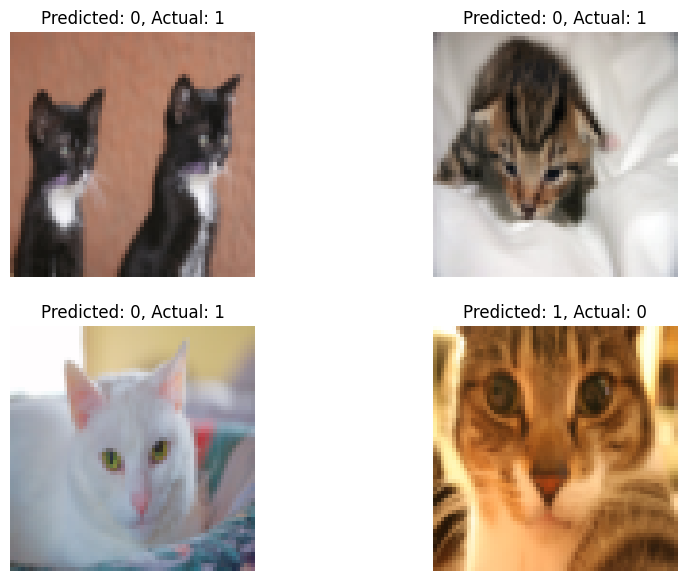

Indices of incorrect predictions in the original test set: [ 0  1  2  3  6  8 10 14 16 19 23 26 27 28 29 31 35 36 38]


In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
%matplotlib inline
import gdown
from scipy.special import expit

# Using https://github.com/wkentaro/gdown

# Define the file IDs
file_ids = [
    '1I1_zbX9aqvl7FaRW1qR36R4PCL7awBlH',
    '1nDk_E5crLPsmLKwq8iykS8s26Xerf_X0'

]

# Define the file names
file_names = [
    'train_catvnoncat.h5',
    'test_catvnoncat.h5'
]

# Download the files
for file_id, file_name in zip(file_ids, file_names):
    url = f'https://drive.google.com/uc?id={file_id}'
    gdown.download(url, output=file_name, quiet=False)

# Now, you can use these files
train_dataset = h5py.File('train_catvnoncat.h5', "r")
test_dataset = h5py.File('test_catvnoncat.h5', "r")

train_X = np.array(train_dataset["train_set_x"][:])
train_Y = np.array(train_dataset["train_set_y"][:])
test_X = np.array(test_dataset["test_set_x"][:])
test_Y = np.array(test_dataset["test_set_y"][:])
classes = np.array(test_dataset["list_classes"][:])
train_Y = train_Y.reshape((1, train_Y.shape[0]))
test_Y  = test_Y.reshape((1, test_Y.shape[0]))



# Reshape and normalize the data
train_X_flat = train_X.reshape(train_X.shape[0], -1).T / 255
test_X_flat = test_X.reshape(test_X.shape[0], -1).T / 255

# Define sigmoid function
def sigmoid(z):
    return expit(z)

# Define propagate function
def propagate(w, b, X, Y):
    m = X.shape[1]
    A = sigmoid(np.dot(w.T, X) + b)
    cost = -np.sum((Y*np.log(A) + (1-Y)*np.log(1-A))) / m
    dw = np.dot(X, (A-Y).T) / m
    db = np.sum(A-Y) / m

    return dw, db, cost

# Define model training function
def train_model(X, Y, w, b, num_iterations, learning_rate):
    costs = []
    for i in range(num_iterations):
        dw, db, cost = propagate(w, b, X, Y)

        w = w - learning_rate * dw
        b = b - learning_rate * db

        if i % 100 == 0:
            costs.append(cost)
            print(f'Cost after iteration {i}: {cost}')

    return w, b, costs

# Make predictions on test set
def predict(w, b, X):
    m = X.shape[1]
    A = sigmoid(np.dot(w.T, X) + b)
    return (A >= 0.5).astype(int)

# Define last digit of ID
last_digit_of_id = 9

# Calculate the number of images to include in the modified training set
num_images_in_train_set = 160 + last_digit_of_id

# Create the modified training set and test set
modified_train_X_flat = train_X_flat[:, :num_images_in_train_set]
modified_train_Y = train_Y[:, :num_images_in_train_set]
modified_test_X_flat = train_X_flat[:, num_images_in_train_set:]
modified_test_Y = train_Y[:, num_images_in_train_set:]

# Set weights and bias for the modified model
w_modified = np.zeros((modified_train_X_flat.shape[0], 1))
b_modified = 0

# Train the model on the modified dataset
num_iterations = 10000 # Adjust to Maximize
learning_rate = 0.006 # Adjust to Maximize
w_modified, b_modified, costs_modified = train_model(modified_train_X_flat, modified_train_Y, w_modified, b_modified, num_iterations, learning_rate)

# Make predictions on the modified test set
Y_pred_test_modified = predict(w_modified, b_modified, modified_test_X_flat)

# Calculate training and test accuracies for the modified model
Y_pred_train_modified = predict(w_modified, b_modified, modified_train_X_flat)
train_accuracy_modified = np.mean(Y_pred_train_modified == modified_train_Y) * 100
test_accuracy_modified = np.mean(Y_pred_test_modified == modified_test_Y) * 100

print(f"Modified Training Accuracy: {train_accuracy_modified:.2f}%")
print(f"Modified Test Accuracy: {test_accuracy_modified:.2f}%")

# Find indices of incorrect predictions in the original test set
incorrect_indices_original_test = np.where(Y_pred_test_modified != modified_test_Y)[1]

# Display 4 of these misclassified images from the original test set
num_display_original_test = min(4, len(incorrect_indices_original_test))

fig = plt.figure(figsize=(10, 7))

for i in range(num_display_original_test):
    idx = incorrect_indices_original_test[i]
    fig.add_subplot(2, 2, i+1)
    plt.imshow(test_X[idx])
    plt.axis('off')
    plt.title(f'Predicted: {Y_pred_test_modified[0, idx]}, Actual: {modified_test_Y[0, idx]}')

plt.show()

# Report indices of all incorrect predictions in the original test set
print("Indices of incorrect predictions in the original test set:", incorrect_indices_original_test)

